# Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import statements for plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.tools as tls
import configparser
# import warnings and supress it
import warnings
warnings.filterwarnings("ignore")

In [4]:
config = configparser.ConfigParser()
config.read("./notebooks_config.ini")

['./notebooks_config.ini']

# 1. Exploratory Data Analysis
Let us load in the dataset via the trusty Pandas package into a dataframe object and have a quick look at the first few rows

In [3]:
data = pd.read_parquet(config['PATH']['RAW_DATA_PATH'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Change the column names to lower case

In [5]:
data.columns = [col.lower() for col in data.columns]

As evinced from the dataset, our target column with which we can point our model to train on would be the "Attrition" column.

In [6]:
display(data.columns)

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

# 2. So... What can we expect?


In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

Variable - Variable name.
* Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
* Expectation - Our expectation about the variable influence in 'Attrition'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
* Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
* Comments - Any general comments that occured to us.

While 'Type'is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).\
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).\
* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).\
    
After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

# 3. First things first: analysing 'Attrition'

In [7]:
#descriptive statistics summary
data["attrition"].describe()

count     1470
unique       2
top         No
freq      1233
Name: attrition, dtype: object

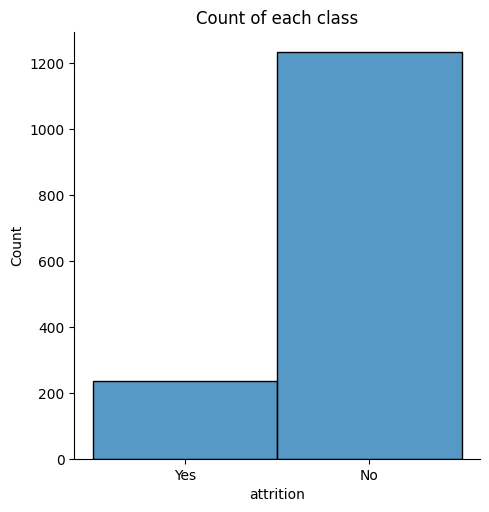

In [8]:
sns.displot(data["attrition"])
plt.title('Count of each class')
plt.show()

OBSERVATIONS:

1. There are two levels - looks like a classification problem
2. Classes are imbalanced

# 4. 'Attrition', her buddies and her interests

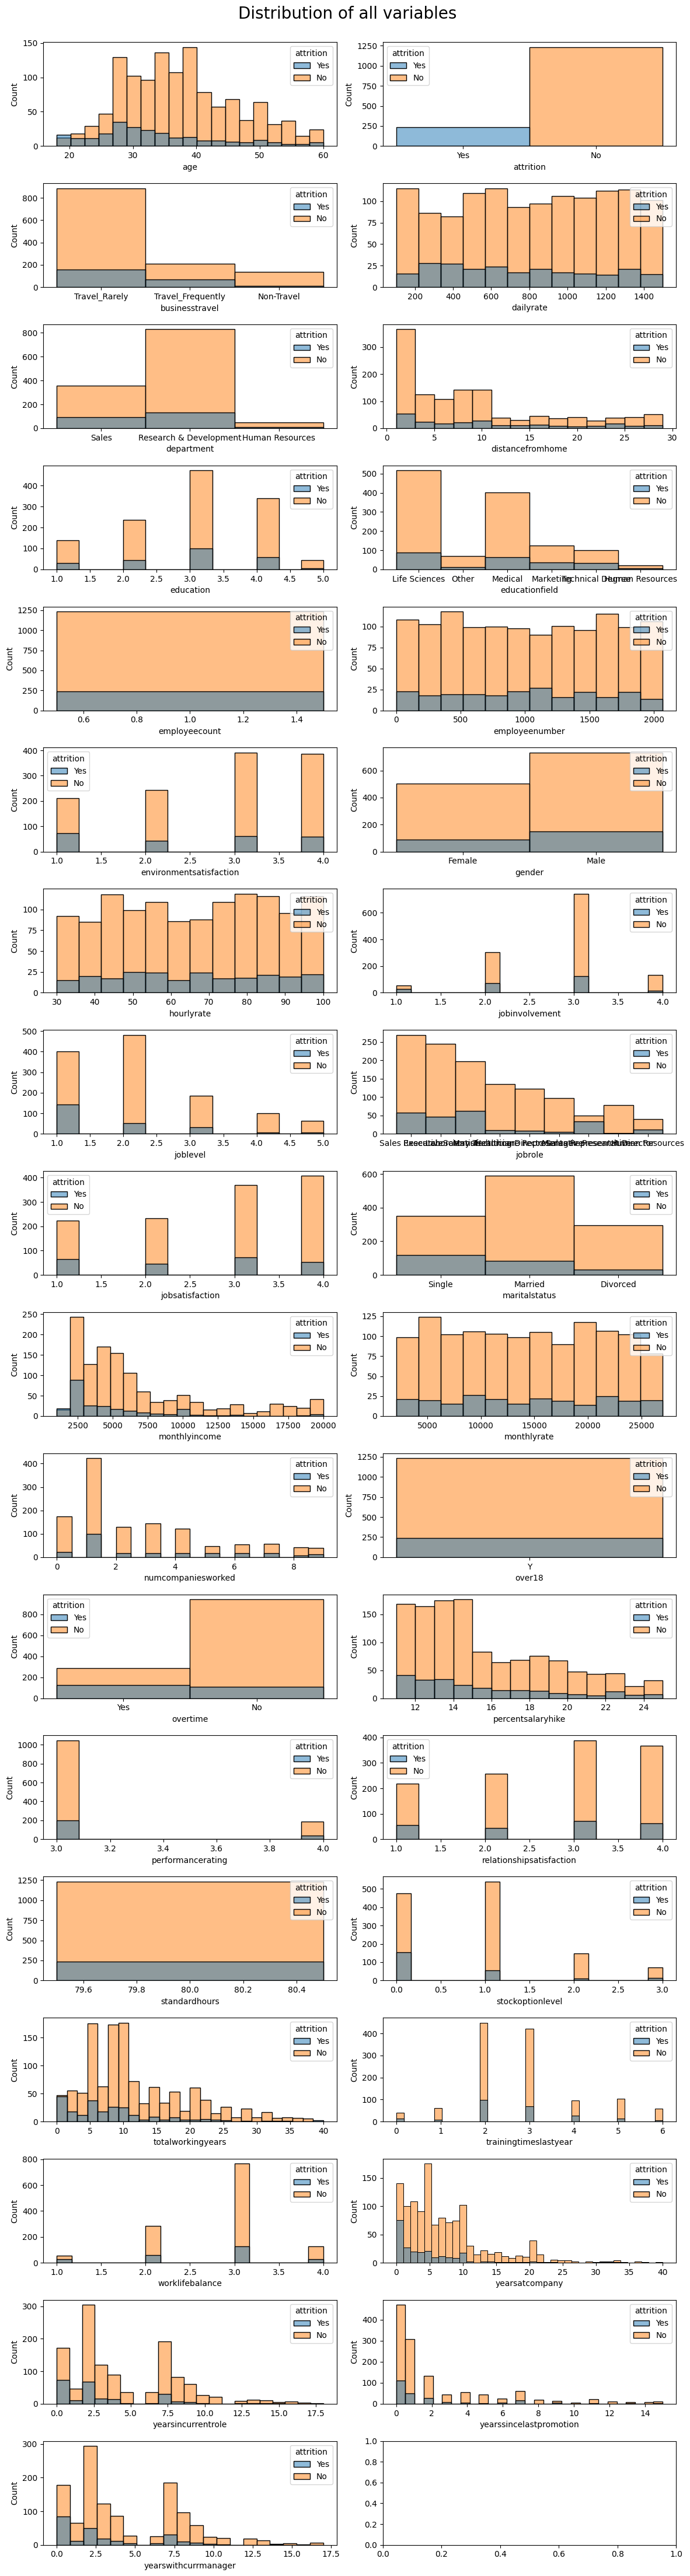

In [9]:
ncols = 2
nrows = np.ceil(len(data.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(data.columns, axs.flatten()):
    sns.histplot(data, x=c, ax=ax, hue="attrition")
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

## OBSERVATIONS:

1. `over18`, `employeecount`, `standardhours`, `employeenumber` have a single value, carrying no information, drop them
2. If the number of levels <=10, we treat it as categorical, otherwise we treat it as numerical

# DATA TRANSFORMATION

In [10]:
# Change column name to lower
data.columns = [col.lower() for col in data.columns]
# Drop `over18`, `employeecount`, `standardhours`, `employeenumber` columns
data.drop(['over18','employeecount', 'standardhours', 'employeenumber'], axis="columns", inplace=True)

In [24]:
categorical_columns = ['businesstravel','department', 'education', 'environmentsatisfaction',
                       'educationfield','gender','jobrole', 'jobinvolvement', 'joblevel','maritalstatus', 'jobsatisfaction',
                       'overtime', 'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance']
numerical_columns = ['age','dailyrate','distancefromhome', 'hourlyrate', 'monthlyincome', 'monthlyrate',
                     'percentsalaryhike', 'numcompaniesworked', 'totalworkingyears', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']